# Generalized control input remapping

In [17]:
from bagpy import bagreader
import numpy
import scipy
import pandas as pd

In [7]:
# load bag

In [8]:
def load_bag_file(bag_path):
    try:
        # Create a bagreader object
        bag = bagreader(bag_path)
        print(f"Bag file loaded successfully: {bag_path}")
        return bag
    except FileNotFoundError:
        print(f"Error: File not found at {bag_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

def list_and_extract_topics(bag_path):
    try:
        # Load the bag file
        bag = bagreader(bag_path)
        
        # List all available topics
        topics = bag.topics
        print(f"Topics available in the bag file: {topics}")
        
        # Dictionary to store extracted CSV file paths for each topic
        csv_files = {}
        
        # Extract each topic's data to CSV
        for topic in topics:
            print(f"Extracting topic: {topic}")
            csv_file = bag.message_by_topic(topic)
            csv_files[topic] = csv_file
            print(f"Data for topic '{topic}' saved to: {csv_file}")
    except FileNotFoundError:
        print(f"Error: File not found at {bag_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
        
    return csv_files

In [9]:
bag = load_bag_file("./selected_topics.bag")

[INFO]  Successfully created the data folder ./selected_topics.
Bag file loaded successfully: ./selected_topics.bag


In [14]:
csv_files = list_and_extract_topics("./selected_topics.bag")

[INFO]  Data folder ./selected_topics already exists. Not creating.
Topics available in the bag file: dict_keys(['/hand_2d', '/hh_img', '/hpe_2d', '/pose1', '/pose2', '/rectify_color/parameter_descriptions', '/rectify_color/parameter_updates', '/rosout', '/rosout_agg', '/tf', '/tf_static', '/vect1', '/vect2'])
Extracting topic: /hand_2d
Data for topic '/hand_2d' saved to: ./selected_topics/hand_2d.csv
Extracting topic: /hh_img
Data for topic '/hh_img' saved to: ./selected_topics/hh_img.csv
Extracting topic: /hpe_2d
Data for topic '/hpe_2d' saved to: ./selected_topics/hpe_2d.csv
Extracting topic: /pose1
Data for topic '/pose1' saved to: ./selected_topics/pose1.csv
Extracting topic: /pose2
Data for topic '/pose2' saved to: ./selected_topics/pose2.csv
Extracting topic: /rectify_color/parameter_descriptions
Data for topic '/rectify_color/parameter_descriptions' saved to: ./selected_topics/rectify_color-parameter_descriptions.csv
Extracting topic: /rectify_color/parameter_updates
Data for t

In [26]:
topcs_interest = ['/hand_2d', '/hpe_2d', '/pose1', '/pose2']

dataframes_ = {}
# TODO: Depends on the bag name
for element in topcs_interest:
    print(element)
    df_ = pd.read_csv(f"./selected_topics{element}.csv")
    dataframes_[f'{element}'] = df_

/hand_2d
/hpe_2d
/pose1
/pose2


In [41]:
dataframes_['/hpe_2d'].columns

dataframes_['/hpe_2d']['r_shoulder.x']

0       58.0
1       58.0
2       58.0
3       59.0
4       58.0
        ... 
1552    25.0
1553    25.0
1554    25.0
1555    26.0
1556    26.0
Name: r_shoulder.x, Length: 1557, dtype: float64

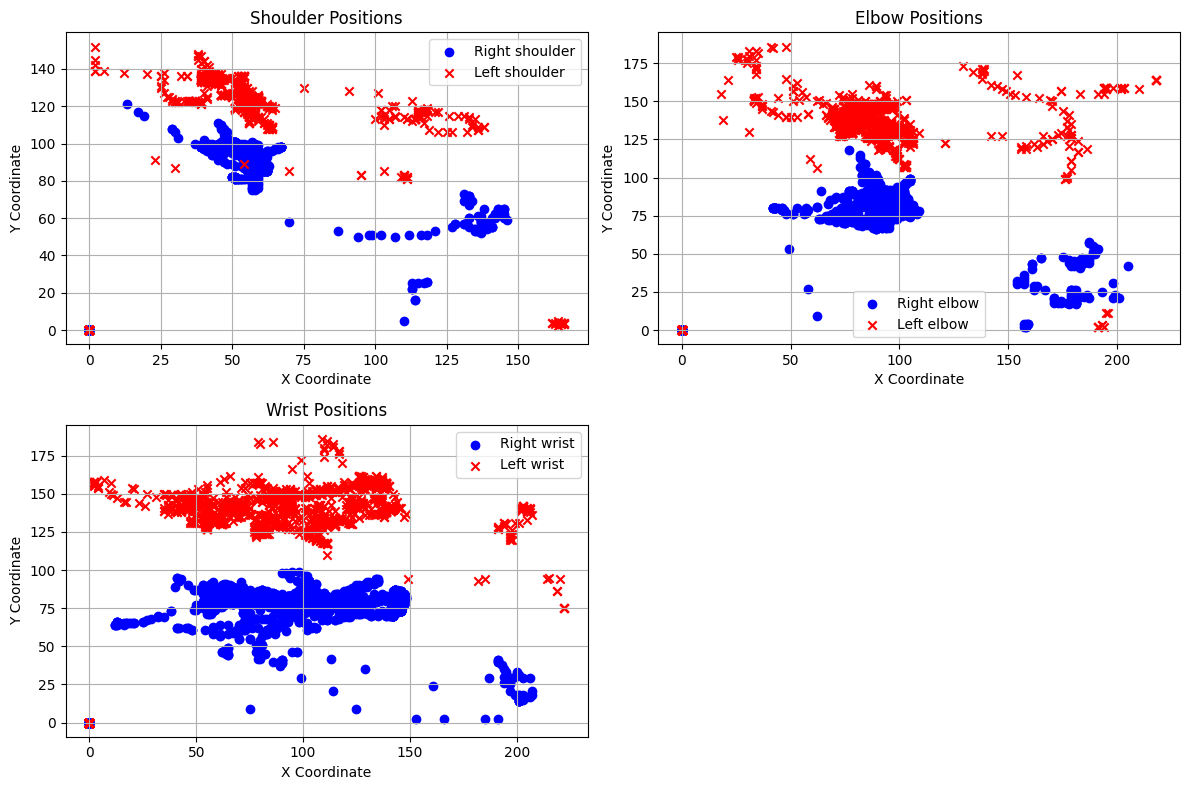

In [46]:
import matplotlib.pyplot as plt

# It is maybe better to use scatter for this :) 
# TODO check stability (num of 0,0 detections)
def plot_upper_body(df):
    """
    Plots the upper body points (right and left) on subplots with 2 columns.

    Parameters:
        df (DataFrame): The input DataFrame containing the body point data.
    """
    # Define the upper body points
    upper_body_points = ['shoulder', 'elbow', 'wrist']

    # Create subplots (2 columns, calculate rows dynamically)
    n_rows = len(upper_body_points) // 2 + len(upper_body_points) % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axes = axes.flatten()

    for idx, point in enumerate(upper_body_points):
        # Get the x and y columns for right and left
        r_x = f"r_{point}.x"
        r_y = f"r_{point}.y"
        l_x = f"l_{point}.x"
        l_y = f"l_{point}.y"

        # Plot on the current subplot
        ax = axes[idx]
        ax.scatter(df[r_y], df[r_x], label=f"Right {point}", color='blue', marker='o')
        ax.scatter(df[l_y], df[l_x], label=f"Left {point}", color='red', marker='x')

        # Add labels and title
        ax.set_title(f"{point.capitalize()} Positions")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for ax in axes[len(upper_body_points):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_upper_body(dataframes_['/hpe_2d'])

In [52]:
def plot_upper_body_with_custom_axes(df, x_min=0, x_max=244, y_min=0, y_max=244):
    """
    Plots the upper body points (right and left) on subplots with 2 columns.
    The plot uses a coordinate system where (0, 0) is the upper-left corner,
    with X increasing to the right and Y increasing downward.

    Parameters:
        df (DataFrame): The input DataFrame containing the body point data.
        x_min, x_max (int): Limits for the X-axis.
        y_min, y_max (int): Limits for the Y-axis.
    """
    # Define the upper body points
    upper_body_points = ['shoulder', 'elbow', 'wrist']

    # Create subplots (2 columns, calculate rows dynamically)
    n_rows = len(upper_body_points) // 2 + len(upper_body_points) % 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axes = axes.flatten()

    for idx, point in enumerate(upper_body_points):
        # Get the x and y columns for right and left
        r_x = f"r_{point}.x"
        r_y = f"r_{point}.y"
        l_x = f"l_{point}.x"
        l_y = f"l_{point}.y"

        # Plot on the current subplot
        ax = axes[idx]
        ax.scatter(df[r_x], df[r_y], label=f"Right {point}", color='blue', marker='o')
        ax.scatter(df[l_x], df[l_y], label=f"Left {point}", color='red', marker='x')

        # Set custom axis limits and invert Y-axis
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_max, y_min)  # Invert Y-axis (0,0 is upper-left corner)

        # Add labels and title
        ax.set_title(f"{point.capitalize()} Positions")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.legend()
        ax.grid(True)

    # Hide any unused subplots
    for ax in axes[len(upper_body_points):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

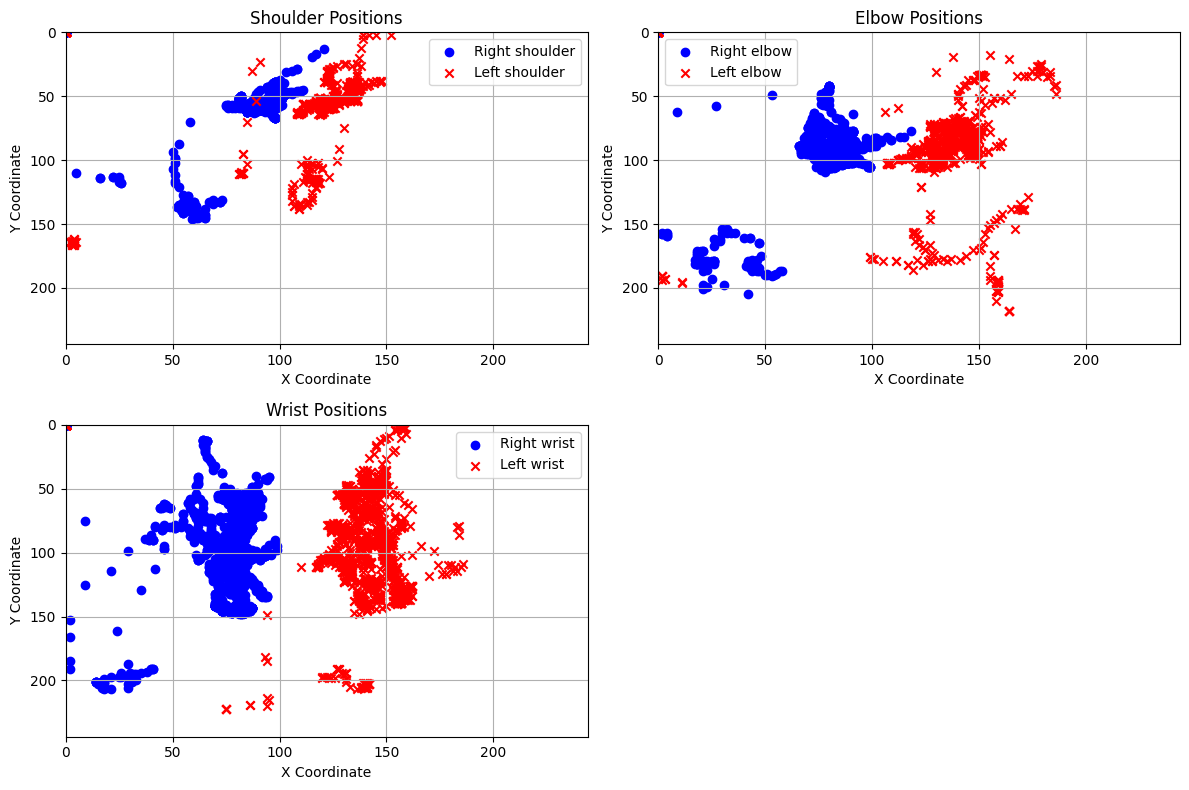

In [53]:
plot_upper_body_with_custom_axes(dataframes_['/hpe_2d'])

In [69]:
def count_zeros_as_percentage(df):
    """
    Counts the percentage of zero values for each column in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.

    Returns:
        DataFrame: A summary DataFrame showing the percentage of zeros for each column.
    """
    # Calculate the percentage of zeros for each column
    zero_percentages = (df == 0).sum() / len(df) * 100

    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Column': zero_percentages.index,
        'Zero_Percentage': zero_percentages.values
    }).sort_values(by='Zero_Percentage', ascending=False)

    # Formatting the percentage for readability
    summary['Zero_Percentage'] = summary['Zero_Percentage'].map("{:.2f}%".format)

    return summary
    

In [68]:
sum_ = count_zeros_as_percentage(dataframes_['/hpe_2d'])
print(sum_)

                Column Zero_Percentage
40           l_ankle.y         100.00%
37           r_ankle.x         100.00%
15              neck.x         100.00%
16              neck.y         100.00%
38           r_ankle.y         100.00%
39           l_ankle.x         100.00%
13             r_ear.x          41.94%
14             r_ear.y          41.94%
33            r_knee.x          10.53%
34            r_knee.y          10.53%
35            l_knee.x          10.34%
36            l_knee.y          10.34%
32             l_hip.y           9.63%
31             l_hip.x           9.63%
30             r_hip.y           9.38%
29             r_hip.x           9.38%
28           l_wrist.y           7.39%
27           l_wrist.x           7.39%
25           r_wrist.x           6.49%
26           r_wrist.y           6.49%
10             r_eye.y           5.59%
9              r_eye.x           5.59%
5               nose.x           4.43%
21           r_elbow.x           4.43%
22           r_elbow.y   

In [62]:
def plot_shoulder_elbow_wrist_over_time(df):
    """
    Plots the .x and .y coordinates of shoulder, elbow, and wrist over time
    in a 1x3 subplot layout.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.
    """
    # Define the body parts to plot
    body_parts = ['shoulder', 'elbow', 'wrist']

    # Create a 1x3 subplot layout
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))

    for i, part in enumerate(body_parts):
        ax = axes[i]

        # Plot .x and .y values for right and left side
        ax.plot(df['Time'], df[f'r_{part}.x'], label=f'Right {part} .x', color='blue', linestyle='-', marker='o')
        ax.plot(df['Time'], df[f'r_{part}.y'], label=f'Right {part} .y', color='blue', linestyle='--', marker='x')
        ax.plot(df['Time'], df[f'l_{part}.x'], label=f'Left {part} .x', color='red', linestyle='-', marker='o')
        ax.plot(df['Time'], df[f'l_{part}.y'], label=f'Left {part} .y', color='red', linestyle='--', marker='x')

        # Set title, labels, and grid
        ax.set_title(f'{part.capitalize()} Positions Over Time')
        ax.set_xlabel('Time')
        ax.set_ylabel('Coordinate Value')
        ax.grid(True)
        ax.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

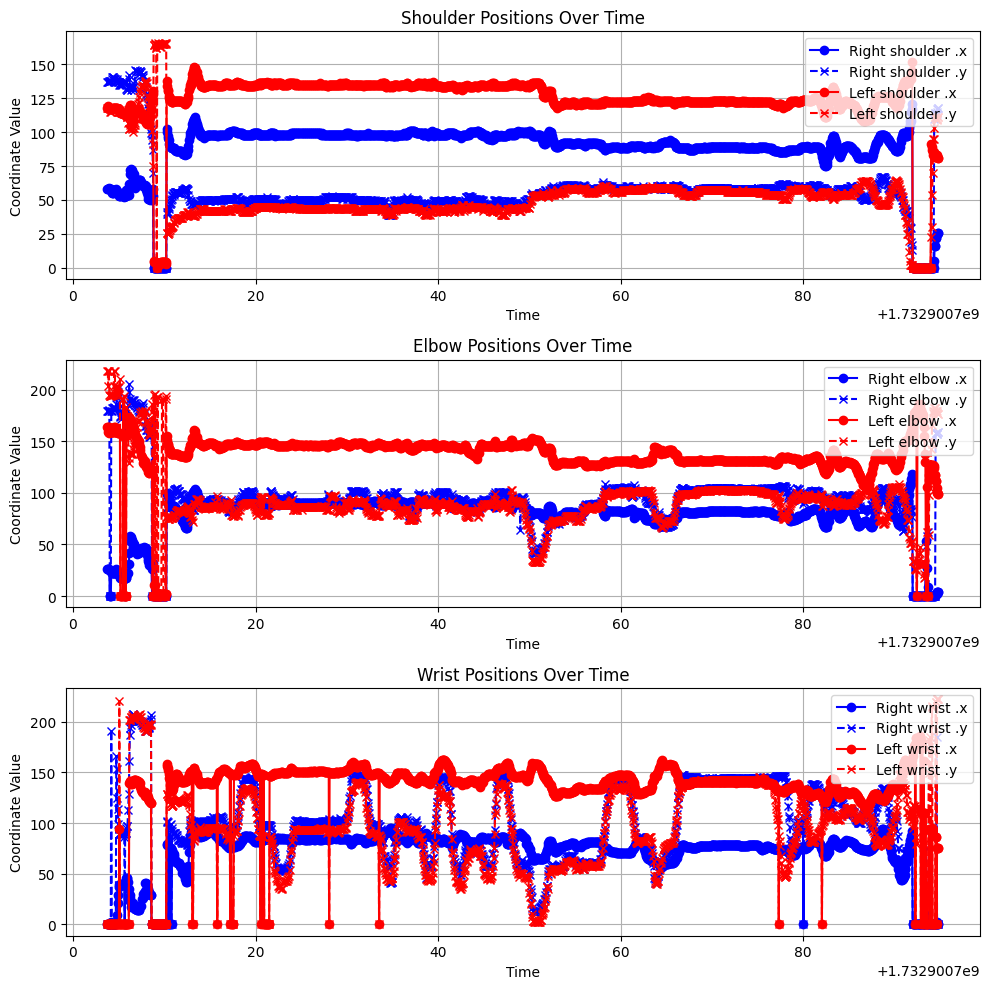

In [63]:
plot_shoulder_elbow_wrist_over_time(dataframes_['/hpe_2d'])

In [70]:
def plot_zero_percentage_histogram(df):
    """
    Plots a histogram of the percentage of zeros for each keypoint with labeled bars.
    Assumes input DataFrame has columns: 'index', 'keypoint', and 'percentage'.

    Parameters:
        df (DataFrame): DataFrame containing the keypoints and their zero percentages.
    """
    # Extract the necessary columns
    keypoints = df['keypoint']
    zero_percentages = df['percentage'].apply(lambda x: float(x.strip('%')))  # Convert percentage to numeric
    
    # Create the histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(keypoints, zero_percentages, color='skyblue', edgecolor='black')

    # Add labels above bars
    for bar, percentage in zip(bars, zero_percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.1f}%', 
                ha='center', fontsize=9)

    # Set plot title and labels
    ax.set_title('Percentage of Zeros for Each Keypoint', fontsize=16)
    ax.set_xlabel('Keypoints', fontsize=12)
    ax.set_ylabel('Percentage of Zeros (%)', fontsize=12)
    ax.set_xticks(range(len(keypoints)))
    ax.set_xticklabels(keypoints, rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



In [73]:
plot_zero_percentage_histogram(dataframes_['/hpe_2d'])

KeyError: 'keypoint'

## 3D information 
- [ ] add Hand 3D and HPE 3D for easier command generation in future